# Практическое задание к уроку 3. TensorFlow

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

1-2.(*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?


## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow -latest


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -l


In [3]:
!pip install --upgrade tensorflow

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

dict_error = {}

## Анализ датасета

Cтруктуры полученного массива данных:

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Структура тестовой выборки:

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

## Preprocess the data

Пример изображений с помощью matplotlib:

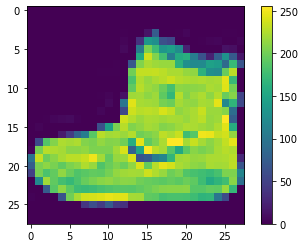

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Первые 25 изображений:

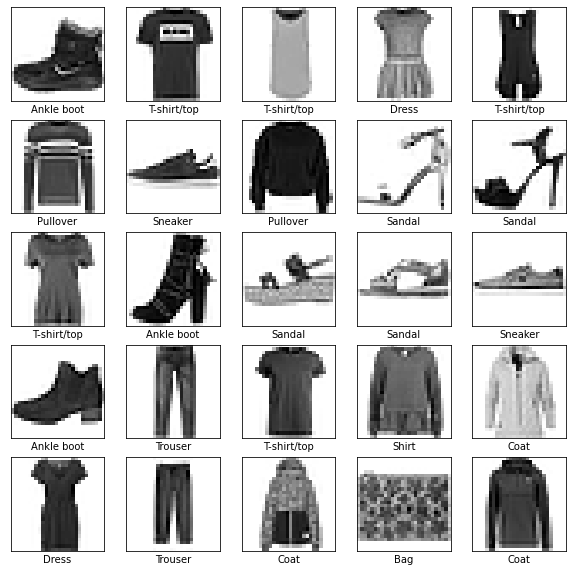

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2022-01-05 16:56:29.168376: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Первый слой, tf.keras.layers.Flatten, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели
Rлючевые понятия, которые понадобяться при компиляции:

- *Loss function* — меряет как точно работает нейросеть.

- *Optimizer* — определяет способ корректировки весов.

- *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [16]:
# %%time
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Тренировка модели

Данные передаются в нейросеть и сопоставляются изображения и лейблы.

### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - model.fit:

In [17]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
   1/1875 [..............................] - ETA: 9:02 - loss: 2.8944 - accuracy: 0.0000e+00

/Users/alenakukhta/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 2s 748us/step - loss: 0.5029 - accuracy: 0.8223
Epoch 2/30
1875/1875 [==============================] - 1s 728us/step - loss: 0.3801 - accuracy: 0.8644
Epoch 3/30
1875/1875 [==============================] - 2s 819us/step - loss: 0.3382 - accuracy: 0.8759
Epoch 4/30
1875/1875 [==============================] - 1s 724us/step - loss: 0.3134 - accuracy: 0.8854
Epoch 5/30
1875/1875 [==============================] - 1s 720us/step - loss: 0.2976 - accuracy: 0.8910
Epoch 6/30
1875/1875 [==============================] - 1s 725us/step - loss: 0.2793 - accuracy: 0.8970
Epoch 7/30
1875/1875 [==============================] - 1s 736us/step - loss: 0.2678 - accuracy: 0.9012
Epoch 8/30
1875/1875 [==============================] - 1s 727us/step - loss: 0.2570 - accuracy: 0.9043
Epoch 9/30
1875/1875 [==============================] - 1s 719us/step - loss: 0.2468 - accuracy: 0.9082
Epoch 10/30
1875/1875 [==============================] - 1s 719us/step - lo

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3915 - accuracy: 0.8880 - 221ms/epoch - 707us/step

Test accuracy: 0.8880000114440918


В выводе выше следим за точностью в процессе обучения, проверяем ее на тестовых даннsх и меняем параметры нейросети если точность на тестовых данных не устраивает.

#### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети:

In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[0]

array([0.085342  , 0.085342  , 0.085342  , 0.085342  , 0.085342  ,
       0.08534203, 0.085342  , 0.0853778 , 0.085342  , 0.23188621],
      dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib дает возможность посмотреть предсказание графически:

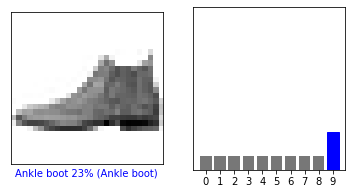

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

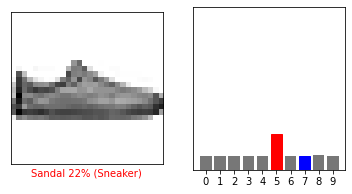

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

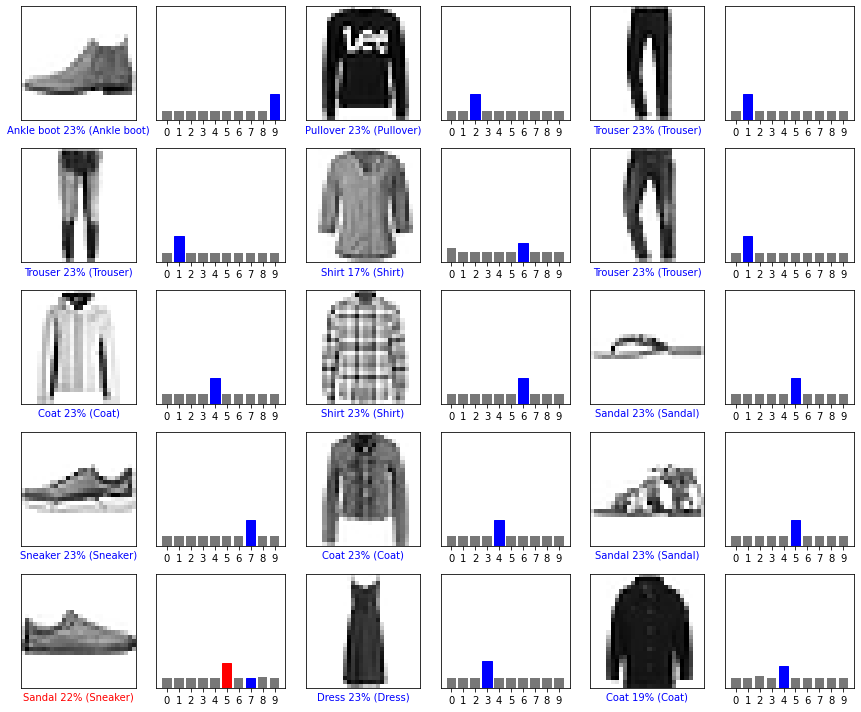

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Использование полученной модели

Предсказание нейронной сети на тестовой выборке:

In [28]:
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08538464 0.08536959 0.23144895 0.08536959 0.08557893 0.08536959
  0.08537003 0.08536959 0.08536959 0.08536959]]


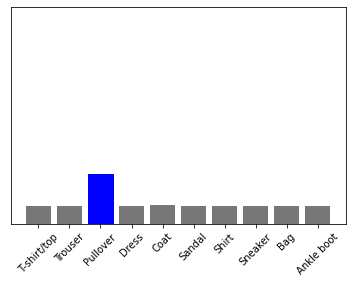

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

keras.Model.predict возвращает список списков — по одному списку для каждого предсказания в батче. 
Предсказания для одного изображения:

In [32]:
np.argmax(predictions_single[0])

2

## 3. Поработайте с документацией TensorFlow 2. 

Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

Следуя своей логике из предыдущего задания, хотелось попробовать какой-нибудь другой слой вместо Dense. В итоге случайно в справочнике по функциям активации (https://keras.io/api/layers/activations/#elu-function) увидел Conv2D и помощью статьи https://habr.com/ru/post/454986/ понял, что оказывается это сверточная нейросеть. 
Основная сложность - это понять, какие подходы эффективны для разных типов данных, а так же размерность данных, которые мы передаем в модель на разных этапах.

## 1-2.(*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.

Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [42]:
import numpy as np

In [41]:
# df = tfds.as_dataframe(ds.take(10), ds_info)

NameError: name 'tfds' is not defined

In [ ]:
import typing
from typing import Any, Callable, Dict, List, Optional, Tuple

# import dataset_info

In [ ]:
from TensorFlow import dataset_info

In [48]:
def as_dataframe(
    ds: tf.data.Dataset,
    ds_info: Optional[dataset_info.DatasetInfo] = None,
) -> StyledDataFrame:
  """Convert the dataset into a pandas dataframe.
  Warning: The dataframe will be loaded entirely in memory, you may
  want to call `tfds.as_dataframe` on a subset of the data instead:
  ```
  df = tfds.as_dataframe(ds.take(10), ds_info)
  ```
  Args:
    ds: `tf.data.Dataset`. The tf.data.Dataset object to convert to panda
      dataframe. Examples should not be batched. The full dataset will be
      loaded.
    ds_info: Dataset info object. If given, helps improving the formatting.
      Available either through `tfds.load('mnist', with_info=True)` or
      `tfds.builder('mnist').info`
  Returns:
    dataframe: The `pandas.DataFrame` object
  """
  # Raise a clean error message if panda isn't installed.
  lazy_imports_lib.lazy_imports.pandas  # pylint: disable=pointless-statement

  # Pack `as_supervised=True` datasets
  if ds_info:
    ds = dataset_info.pack_as_supervised_ds(ds, ds_info)

  # Flatten the keys names, specs,... while keeping the feature key definition
  # order
  columns = _make_columns(ds.element_spec, ds_info=ds_info)
  rows = [_make_row_dict(ex, columns) for ex in dataset_utils.as_numpy(ds)]
  df = StyledDataFrame(rows)
  df.current_style.format({c.name: c.format_fn for c in columns if c.format_fn})
  return df

NameError: name 'dataset_info' is not defined

In [33]:
imdb = keras.datasets.imdb
(train_images, train_labels), (test_images, test_labels) = imdb.load_data()

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
%%time
model.fit(train_images, train_labels, epochs=30)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).